# Loading pretrain model

In [ ]:
%tensorflow_version 1.x
import tensorflow

TensorFlow 1.x selected.


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import color
from skimage import io
from PIL import Image
import PIL.ImageOps   

Using TensorFlow backend.


In [ ]:
# # fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [ ]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
# pip install tensorflow-gpu==1.14 ## downgrade to support Keras

In [ ]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 42s 696us/step - loss: 0.4898 - accuracy: 0.8415 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 2/2
60000/60000 [==============================] - 40s 662us/step - loss: 0.1592 - accuracy: 0.9523 - val_loss: 0.0577 - val_accuracy: 0.9815


In [ ]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.05769324681917205, 0.9815000295639038]


In [ ]:
#My laptop has no GPU so I uploaded the plots to google drive and use google colab to generate prediction

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Generate Mircrosoft prediction


In [1]:
# get all image from folder
import glob

files = []
for file in glob.glob("/content/drive/My Drive/Location plot/Smoothed2/*.png"):
    files.append(file)
print(len(files))

0


In [2]:
y_pred_list = []

# generate prediction for every trajectories
for i in range (0,len(files)):
  image = Image.open(files[i]).convert("RGB")
  invert_img = PIL.ImageOps.invert(image)   #invert image
  invert_img = np.asarray(invert_img)   #convert image to nparray

  gray_img = color.rgb2gray(invert_img) #convert to grayscale
  gray_img = resize(gray_img, (28, 28)) #resize to fit network

  im2arr = gray_img.reshape(1,28,28,1) #reshape

  y_pred = model.predict_classes(im2arr) #make prediction
  y_pred_list.append(y_pred[0])

In [3]:
import pickle
'''dump prediction to pickle file'''
# with open('prediction.pkl', 'wb') as f:
#   pickle.dump(y_pred_list, f)

'''load prediction results from pickle file'''
# with open('drive/My Drive/Jiajia Research/prediction.pkl', 'rb') as f:
#   y_pred_list = pickle.load(f)

In [4]:
# grouped the trajectories based on labels
one = []
two = []
three = []
four = []
five = []
six = []
seven = []
eight = []
nine = []
zero = []
for i in range (0, len(y_pred_list)):
  if (y_pred_list[i] == 1 ) :
      one.append(i)
  elif (y_pred_list[i] == 2 ) :
      two.append(i)
  elif (y_pred_list[i] == 3 ) :
      three.append(i)  
  elif (y_pred_list[i] == 4 ) :
      four.append(i)
  elif (y_pred_list[i] == 5 ) :
      five.append(i)
  elif (y_pred_list[i] == 6 ) :
      six.append(i)
  elif (y_pred_list[i] == 7 ) :
      seven.append(i)
  elif (y_pred_list[i] == 8 ) :
      eight.append(i)
  elif (y_pred_list[i] == 9 ) :
      nine.append(i)
  elif (y_pred_list[i] == 0 ) :
      zero.append(i)

In [5]:
print ("number of 0: ", len(zero))
print ("number of 1: ", len(one))
print ("number of 2: ", len(two))
print ("number of 3: ", len(three))
print ("number of 4: ", len(four))
print ("number of 5: ", len(five))
print ("number of 6: ", len(six))
print ("number of 7: ", len(seven))
print ("number of 8: ", len(eight))
print ("number of 9: ", len(nine))

number of 0:  0
number of 1:  0
number of 2:  0
number of 3:  0
number of 4:  0
number of 5:  0
number of 6:  0
number of 7:  0
number of 8:  0
number of 9:  0


# Visualization


<Figure size 432x288 with 0 Axes>

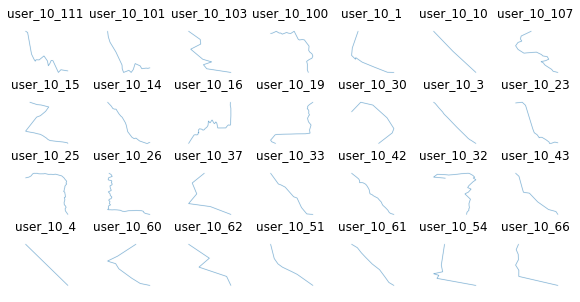

In [ ]:
# Show the plot for each category
digit = two 

from pathlib import Path

plt.figure()

rows,cols = 4 ,7
fig, ax = plt.subplots(rows, cols,
                      #  sharex='col', 
                      #  sharey='row',
                       figsize=(10, 5))

for row in range(rows):
    for col in range(cols):
        ax[row,col].imshow(Image.open(files[digit[row*cols + col]]))
        ax[row,col].axis('off')
        ax[row,col].set_title(Path(files[digit[row*cols + col]]).stem)